In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import PyPDF4

import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
#mensajes presidenciales
#disponibles en: https://www.gob.pe/mensajepresidencial

pdf_1 = PyPDF4.PdfFileReader(open('../data/discurso_pedrocastillo.pdf', 'rb'))
pdf_2 = PyPDF4.PdfFileReader(open('../data/discurso_guidobellido_pcm.pdf', 'rb'))
pdf_3 = PyPDF4.PdfFileReader(open('../data/discurso_martinvizcarra.pdf', 'rb'))
pdf_4 = PyPDF4.PdfFileReader(open('../data/discurso_ppk.pdf', 'rb'))

In [200]:
lista = list()
for i in range(1,5):
    temp = 'pdfdata_'+str(i)
    lista.append(temp)

In [201]:
lista

['pdfdata_1', 'pdfdata_2', 'pdfdata_3', 'pdfdata_4']

In [216]:
lista2 = list()
for i in range(1,5):
    temp = 'pdf_'+str(i)
    lista2.append(temp)

In [219]:
lista2[0]

'pdf_1'

In [220]:
for i in lista:
    vars()[i] = ''
    j=i-1
    for page in lista2[j].pages:
        vars()[i] += page.extractText()
        #lower().replace('\n','')

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [205]:
pdfdata_4

' \n \n1\n \n \nD\nISCURSO DE ASUNCI\nÓN \nDEL PRESIDENTE DE LA REP\nÚBLICA, \nJ\nOS\nÉ PEDRO CASTILLO TERRONES\n \n \n28\n \nDE \nJUL\nIO\n \nDE 2021\n \n \n \n \n \nSeñora President\na\n \ndel Congreso de la República\n \n \nS\neñores\n \ny señoras\n \ncongresistas de la \nR\nepública, \n \n \nS\neñor\nes\n \nPresidente\ns\n \nde la\ns hermanas\n \nr\nepública\ns\n \nde\n \nArgentina, Bolivia, \nChile, Colombia, Ecuador, México, su Alteza el Rey de España.\n \n \nS\neñores miembros del \nhonorable cuerpo diplomático\n.\n \n \nA\nutoridades presentes\n. \n \n \nM\nujeres y hombres de mi amado pueblo peruano.\n \n \nComienzo saludando\n \na mis hermanos descendientes de los pueblos \noriginarios del Perú prehispánico, a mis hermanos quechuas, aimaras\n \ny \namazónicos, a los afro\np\neruanos\n \ny a las distintas comunidades \ndescendientes de migrantes, así como a \ntodas las minorías \ndesposeídas del campo y la ciudad\n.\n \nJuntos, decimos hoy,\n \n¡KASHKANIRACMI! ¡SEGUIMOS EXISTI

In [176]:
pdfdata_1 = ''
for page in pdf_1.pages:
    pdfdata_1 += page.extractText()

In [177]:
pdfdata_2 = ''
for page in pdf_2.pages:
    pdfdata_2 += page.extractText()

In [126]:
#to lower
pdfdata_1 = pdfdata_1.lower().replace('\n','')
pdfdata_2 = pdfdata_2.lower().replace('\n','')

In [152]:
stopwords = set(STOPWORDS)
stopwords.update(['y', 'que', 'las', 'e', 'al', 'este', 'un', 'como', 'por', 'su', 'se',
                  'de', 'del', 'lo', 'o', 'una', 'es', 'los', 's', 'todo', 'año', 'mi', 'será', 'sobre',
                  'más', 'ello', 'todos', 'toda', 'donde', 'debe', 'nos', 'eso',
                  '1', 'cada', 'os', 'solo', 'hasta', 'ha', 'mucho', 'l', 'n',
                  'sea', 'han', 'hacer', 'ser', 'otros', 'soles', 'millones',
                  'pero', 'este', 'entre', 'manera', 'esta', 'sus', 'así', 'perú',
                  'medida', 'cuidado', 'programa', 'también', 'nuestras',
                  'desde', 'esto', 'años', 'tenemos', 'ante', 'mil', 'través',
                  'hoy', 'económica', 'república',
                  'cual', 'nivel', 'paí', 'público', 'pública', '. económica', '.económica',
                  'DE', 'LA', 'EXAMEN', 'METODO', 'ACTIVIDADES', 'PROBLEMAS', 'RELACIONADOS', 
                  'ESPECIFICACION','OTRAS', 'ESPECIFICADA','SIN','OTRA', 'PARA','CON', 'EN',
                  'EL','IM','USO', 'REPETICION','FACTOR','TRIMESTRAL','SEMANAS','MENSUAL',
                  'SEMANA','TRIMESTRE','INICIAL'])

In [171]:
# Create and generate a word cloud image:
wordcloud1 = WordCloud(stopwords=stopwords, 
                      max_words=30,
                      max_font_size=45,
                      background_color="white").generate(pdfdata_1)

In [172]:
# Create and generate a word cloud image:
wordcloud2 = WordCloud(stopwords=stopwords, 
                      max_words=30,
                      max_font_size=45,
                      background_color="white").generate(pdfdata_2)

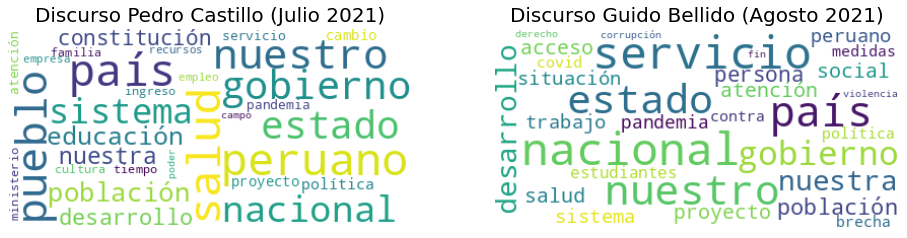

In [173]:
plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title('Discurso Pedro Castillo (Julio 2021)', size=20)
plt.subplot(1,2,2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Discurso Guido Bellido (Agosto 2021)', size=20)
plt.show()